In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

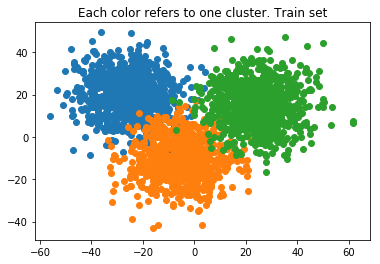

In [41]:
# Generate Data
loc = ((-25, 20), (-5, -10), (25, 15)) # x, y
scale = (10, 10, 10)
size = ((1000, 2), (1000, 2), (1000, 2)) # Num points x features

clusters = [np.random.normal(loc=l, scale=s, size=si) for l, s, si in zip(loc, scale, size)]

# Add labels to each point
clusters = [np.concatenate((cluster, np.ones((cluster.shape[0], 1))*idx), axis=-1) 
            for idx, cluster in enumerate(clusters) ]

train_share = .8

# Here we have the points per cluster
cluster_train = [points[:int(points.shape[0]*train_share), :] for points in clusters]
cluster_val = [points[:int(points.shape[0]*(1-train_share)), :] for points in clusters]

# Here we have the train set merged. Same for val.
train = np.concatenate(cluster_train)
val =  np.concatenate(cluster_val)

def plt_points(cluster_list):
    for cluster in cluster_list:
        plt.scatter(cluster[:, 0], cluster[:, 1])

plt_points(cluster_train)
plt.title("Each color refers to one cluster. Train set")
plt.show()

In [47]:
def calculate_gini_impurity(points, max_label=3):
    
    n_points = points.shape[0]
    impurity = 1
    for label in range(max_label):
        n_label = sum(points[:, 2] == label)
        impurity -= (n_label/n_points)**2
    
    return impurity

calculate_gini_impurity(train)
    
    
    

0.6666666666666665

In [35]:
a = np.ones((100, 2))
b = np.ones((100, 1))

In [38]:
np.concatenate((a, b), axis=-1).shape

(100, 3)